In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 270s 369ms/step - accuracy: 0.7342 - loss: 0.5635 - val_accuracy: 0.8671 - val_loss: 0.3931
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 160s 224ms/step - accuracy: 0.8227 - loss: 0.4272 - val_accuracy: 0.8671 - val_loss: 0.3431
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 160s 225ms/step - accuracy: 0.8322 - loss: 0.3982 - val_accuracy: 0.8910 - val_loss: 0.2964
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 164s 230ms/step - accuracy: 0.8511 - loss: 0.3676 - val_accuracy: 0.8814 - val_loss: 0.3055
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 162s 227ms/step - accuracy: 0.8559 - loss: 0.3533 - val_accuracy: 0.8957 - val_loss: 0.2811
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 160s 225ms/step - accuracy: 0.8598 - loss: 0.3520 - val_accuracy: 0.8874 - val_loss: 0.2987
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 158s 221ms/step - accuracy: 0.8639 - loss: 0.3354 - val_accuracy: 0.8965 - val_loss: 0.2620
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 158s 221ms/step - accuracy: 0.8682 - loss: 0.33

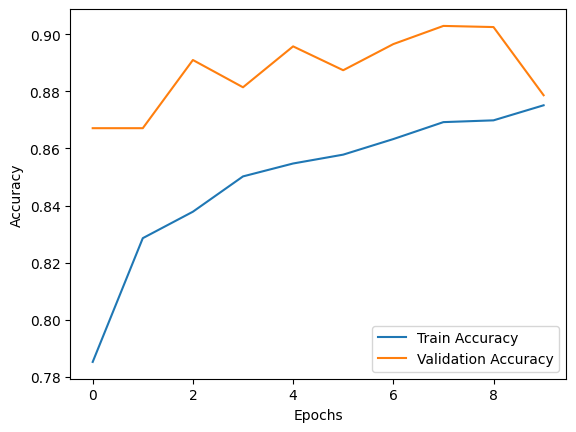

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Dataset paths
train_dir = "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_dir = "/kaggle/input/waste-classification-data/DATASET/TEST"

# Image parameters
img_size = (150, 150)  # Resize images
batch_size = 32

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Use 'categorical' for more than 2 classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Change to Dense(num_classes, activation='softmax') for multi-class
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("waste_classification_model.h5")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
{'O': 0, 'R': 1}


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,018 (18.43 MB)

 Trainable params: 4,829,314 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 293s 397ms/step - accuracy: 0.7578 - loss: 0.6060 - val_accuracy: 0.8185 - val_loss: 0.4239
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 138s 194ms/step - accuracy: 0.8206 - loss: 0.4117 - val_accuracy: 0.8162 - val_loss: 0.4355
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 134s 188ms/step - accuracy: 0.8286 - loss: 0.3907 - val_accuracy: 0.7171 - val_loss: 0.6070
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 185ms/step - accuracy: 0.8481 - loss: 0.3606 - val_accuracy: 0.8444 - val_loss: 0.3664
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 185ms/step - accuracy: 0.8532 - loss: 0.3488 - val_accuracy: 0.8703 - val_loss: 0.3195
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 130s 182ms/step - accuracy: 0.8594 - loss: 0.3363 - val_accuracy: 0.8707 - val_loss: 0.3135
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 131s 183ms/step - accuracy: 0.8696 - loss: 0.3215 - val_accuracy: 0.8599 - val_loss: 0.3155
Epoch 8/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 185ms/step - accuracy: 0.8637 - loss: 0.32

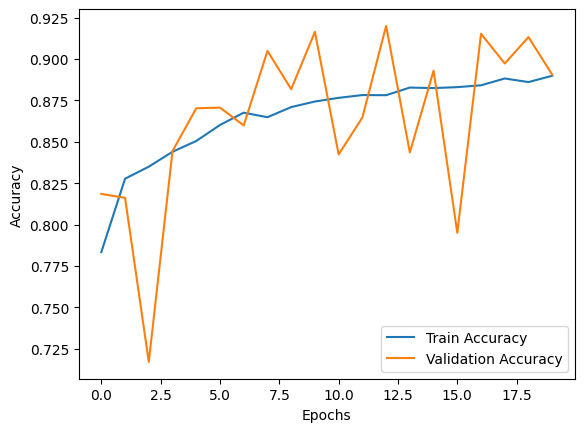

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Input
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset paths
train_dir = "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_dir = "/kaggle/input/waste-classification-data/DATASET/TEST"

# Image parameters
img_size = (150, 150)  # Resize images
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Check class indices
print(train_generator.class_indices)

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    # Output Layer: Adjust units to number of classes (e.g., 6 for 6 waste categories)
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the Model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])
# Model Summary
model.summary()

# Train the Model
history = model.fit(
    train_generator, 
    epochs=20, 
    validation_data=test_generator
)

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the Model
model.save("waste_classification_model.h5")


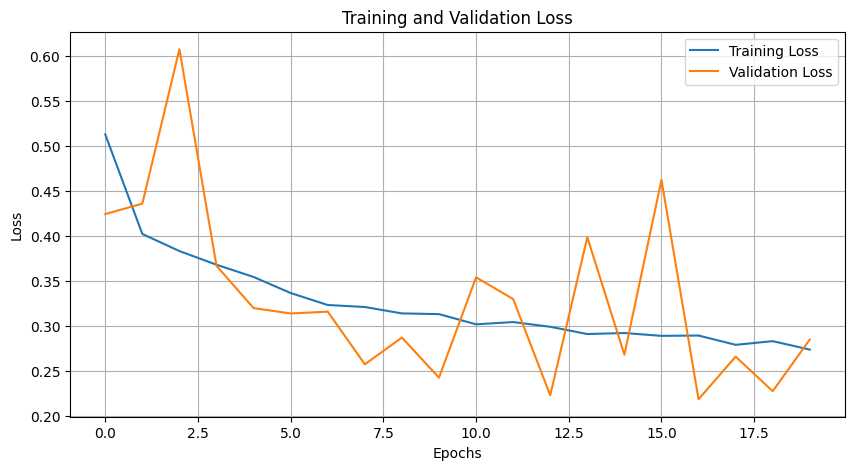

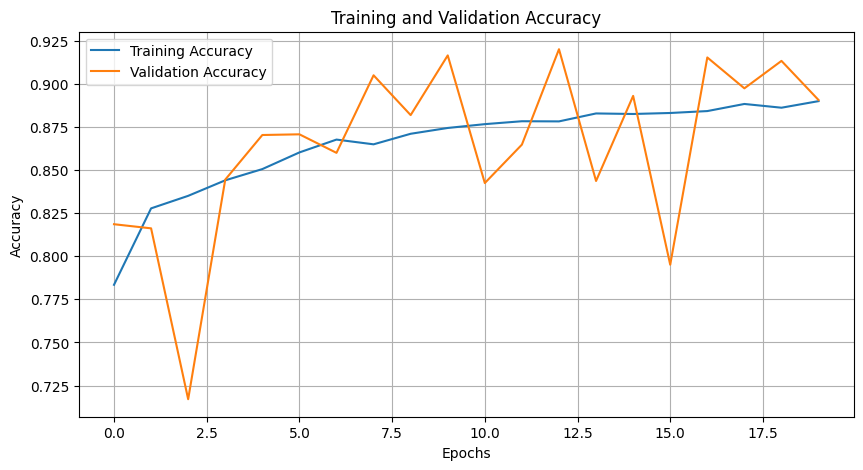

In [9]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
